In [1]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# function for testing the accuracy after the preprocessing techniques
def classify(features, labels):
    # dividing the data into training and testing data
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

    # using the support vector machine classifier
    classifier = SVC()
    pd.options.mode.copy_on_write = True

    classifier.fit(X_train, y_train)
    predicts = classifier.predict(X_val)
    
    print(classification_report(y_val, predicts))

In [3]:
# import kaggele dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# create data frame
df = pd.DataFrame(data)

# check for any null values
pd.isna(any(df))

# there are no null values in whole dataframe, so we can continue

False

In [4]:
# hceck for any duplicated rows
any(df.duplicated())


True

In [5]:
# removing duplicated rows
df = df.drop_duplicates()

# check for any duplicated rows
any(df.duplicated())

False

In [6]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on categorical columns
for i in ['Gender', 'CALC', 'CAEC', 'SCC', 'FAVC', 'SMOKE', 'family_history_with_overweight', 'MTRANS', 'NObeyesdad']:
    df[i] = lab.fit_transform(df[i])

df.head()
target = df['NObeyesdad']
features = df.drop('NObeyesdad', axis=1)

# 1. classify using all features
# test before applaying more sophisticated methods
classify(df, target)
# accuracy is 0.67

              precision    recall  f1-score   support

           0       0.65      0.90      0.75        48
           1       0.81      0.55      0.65        62
           2       0.74      0.47      0.57        73
           3       0.94      0.46      0.62        63
           4       0.62      1.00      0.77        64
           5       0.73      0.70      0.71        53
           6       0.52      0.75      0.61        55

    accuracy                           0.67       418
   macro avg       0.71      0.69      0.67       418
weighted avg       0.72      0.67      0.66       418



In [7]:
#initialize normalizer
scaler = MinMaxScaler()

#calculate all the necessary data to perform the normalization
scaler.fit(features)

#apply the standarizer to the data
df_normalized = pd.DataFrame(scaler.transform(features),columns = features.columns)
df_normalized.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.220279,0.504073,0.476744,0.357155,0.756748,0.883565,0.710733,0.567060,0.045999,0.021083,0.502375,0.825108,0.337604,0.331518,0.617952,0.589722
std,0.135506,0.500103,0.175823,0.195454,0.172336,0.320823,0.267368,0.254871,0.209533,0.143695,0.304142,0.379966,0.284492,0.304077,0.153165,0.316351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125871,0.000000,0.339959,0.201493,0.666667,1.000000,0.500000,0.565822,0.000000,0.000000,0.295461,1.000000,0.041502,0.000000,0.666667,0.750000
50%,0.188247,1.000000,0.474687,0.329113,0.666667,1.000000,0.698133,0.666667,0.000000,0.000000,0.500000,1.000000,0.333333,0.315433,0.666667,0.750000
75%,0.255319,1.000000,0.602814,0.515044,1.000000,1.000000,1.000000,0.666667,0.000000,0.000000,0.733096,1.000000,0.559367,0.500000,0.666667,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# 2. classify using all features after normalization
classify(df_normalized, target)
# accuracy is 0.78

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        48
           1       0.65      0.55      0.60        62
           2       0.78      0.73      0.75        73
           3       0.81      0.97      0.88        63
           4       0.98      0.98      0.98        64
           5       0.75      0.57      0.65        53
           6       0.62      0.69      0.66        55

    accuracy                           0.78       418
   macro avg       0.77      0.77      0.77       418
weighted avg       0.77      0.78      0.77       418



<Axes: >

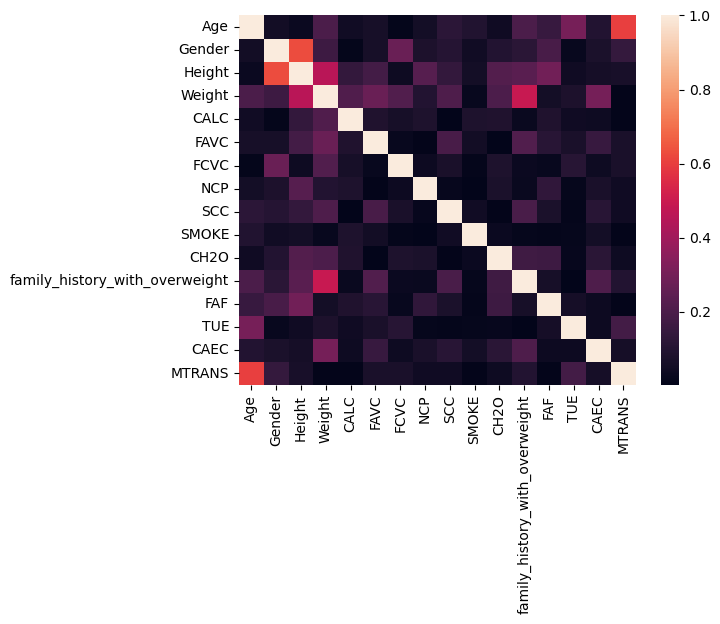

In [9]:
# correlation matrix
sns.heatmap(abs(df_normalized.corr()))

In [10]:
#initialize standard scaler
scaler = StandardScaler()

# perform sandarization
x_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(x_scaled,columns = features.columns)
df_scaled.describe().round(3)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000,2087.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.626,-1.008,-2.712,-1.828,-4.392,-2.755,-2.659,-2.225,-0.220,-0.147,-1.652,-2.172,-1.187,-1.091,-4.036,-1.865
25%,-0.697,-1.008,-0.778,-0.797,-0.523,0.363,-0.788,-0.005,-0.220,-0.147,-0.680,0.460,-1.041,-1.091,0.318,0.507
50%,-0.236,0.992,-0.012,-0.144,-0.523,0.363,-0.047,0.391,-0.220,-0.147,-0.008,0.460,-0.015,-0.053,0.318,0.507
75%,0.259,0.992,0.717,0.808,1.412,0.363,1.082,0.391,-0.220,-0.147,0.759,0.460,0.780,0.554,0.318,0.507
max,5.756,0.992,2.977,3.290,1.412,0.363,1.082,1.699,4.554,6.814,1.637,0.460,2.329,2.199,2.495,1.297


In [11]:
# apply PCA with 5 components
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_scaled)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)
# sum of the explained variance ratio (= 0.53) - is not satisfactory 

[0.16295348 0.11737868 0.096553   0.08514075 0.07015593]


0.5321818401404504

In [12]:
# apply PCA with 14 components
pca = PCA(n_components=14)
x_pca = pca.fit_transform(x_scaled)
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)
# sum of the explained variance ratio (= 0.97) - is satisfactory 

[0.16295348 0.11737868 0.096553   0.08514084 0.07015597 0.06333973
 0.0606014  0.05439768 0.05173865 0.04925272 0.04852097 0.04287101
 0.03760449 0.02529862]


0.9658072409339314

In [13]:
after_extration_df = pd.DataFrame(x_pca,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
# 3. classify using all features after PCA
classify(after_extration_df, target)
# accuracy is 0.80

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        48
           1       0.68      0.58      0.63        62
           2       0.81      0.79      0.80        73
           3       0.92      0.95      0.94        63
           4       1.00      0.98      0.99        64
           5       0.70      0.58      0.64        53
           6       0.67      0.76      0.71        55

    accuracy                           0.80       418
   macro avg       0.79      0.80      0.79       418
weighted avg       0.80      0.80      0.80       418



              precision    recall  f1-score   support

           0       0.86      1.00      0.92        48
           1       0.98      0.71      0.82        62
           2       0.95      0.99      0.97        73
           3       0.93      0.87      0.90        63
           4       0.91      0.94      0.92        64
           5       0.80      0.92      0.86        53
           6       0.93      0.93      0.93        55

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.90       418
weighted avg       0.91      0.91      0.91       418



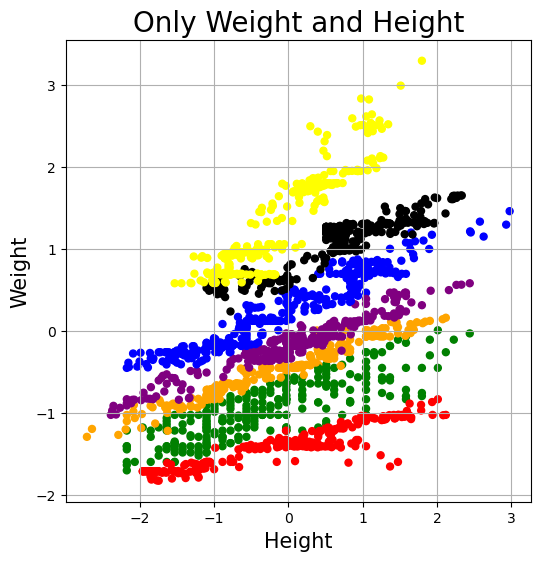

In [14]:
# cut the data frame to only Weight and Height
df_cut = deepcopy(df_scaled)
for i in df_scaled.columns:
    if i != 'Weight' and i != 'Height':
        df_cut.pop(i)

# plot the data
colors = np.array(['red', 'green', 'blue', 'black', 'yellow', 'orange', 'purple'])
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Only Weight and Height', fontsize=20)
ax.set_xlabel('Height', fontsize=15)
ax.set_ylabel('Weight', fontsize=15)
ax.grid()
ax.scatter(df_cut.Height, df_cut.Weight, c=colors[df['NObeyesdad']], s=25)

# 4. classify using only Weight and Height
classify(df_cut, target)
# accuracy is 0.91

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        48
           1       0.95      0.66      0.78        62
           2       1.00      0.97      0.99        73
           3       1.00      1.00      1.00        63
           4       1.00      1.00      1.00        64
           5       0.71      0.91      0.79        53
           6       0.87      0.85      0.86        55

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.90       418
weighted avg       0.92      0.91      0.91       418



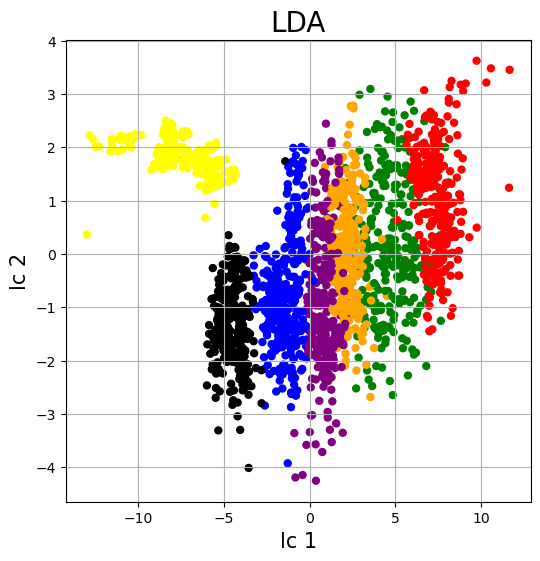

In [15]:
# lda analysis
lda = LDA(n_components = 2)
df_lda = pd.DataFrame(lda.fit_transform(df_scaled, target), columns = ['LC1','LC2'])

# plot the data
colors = np.array(['red', 'green', 'blue', 'black', 'yellow', 'orange', 'purple'])
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('LDA', fontsize=20)
ax.set_xlabel('lc 1', fontsize=15)
ax.set_ylabel('lc 2', fontsize=15)
ax.grid()
ax.scatter(df_lda.LC1, df_lda.LC2, c=colors[df['NObeyesdad']], s=25)

# 5. classify after LDA
classify(df_lda, target)
# accuracy is 0.91

In [16]:
# final test of an accuracy on test data
X_train, X_test, y_train, y_test = train_test_split(df_lda, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
classifier = SVC()
pd.options.mode.copy_on_write = True

classifier.fit(X_train, y_train)
predicts = classifier.predict(X_test)
    
print(classification_report(y_test, predicts))
# acuracy is 0.92

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        53
           1       0.92      0.73      0.81        60
           2       1.00      0.96      0.98        67
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        64
           5       0.76      0.86      0.81        51
           6       0.85      0.87      0.86        53

    accuracy                           0.92       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.92      0.92      0.92       418



In [17]:
# more tests
X_train, X_test, y_train, y_test = train_test_split(df_lda, target, test_size=0.2, random_state=12)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=12)
classifier = SVC()
pd.options.mode.copy_on_write = True

classifier.fit(X_train, y_train)
predicts = classifier.predict(X_test)
    
print(classification_report(y_test, predicts))
# acuracy is 0.93

              precision    recall  f1-score   support

           0       0.81      0.98      0.88        43
           1       0.94      0.77      0.85        62
           2       0.99      0.97      0.98        76
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        58
           5       0.85      0.92      0.88        65
           6       0.90      0.86      0.88        50

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.92       418
weighted avg       0.93      0.93      0.93       418



In [18]:
# more tests
X_train, X_test, y_train, y_test = train_test_split(df_lda, target, test_size=0.2, random_state=35)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=35)
classifier = SVC()
pd.options.mode.copy_on_write = True

classifier.fit(X_train, y_train)
predicts = classifier.predict(X_test)
    
print(classification_report(y_test, predicts))
# acuracy is 0.93

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        58
           1       0.91      0.82      0.86        60
           2       0.97      1.00      0.99        66
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        59
           5       0.81      0.88      0.84        65
           6       0.89      0.82      0.85        50

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418

